In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [136]:
path = './names/'

## Task 1
#### Reading all files into a single data frame.

In [137]:
# task 1

data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)

In [138]:
df.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Task 2
#### Creating a new column containing the last letters of each name.

In [139]:
last_letter = df["name"].str[-1:]
last_letter.head()

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [140]:
df["last letter of name"] = last_letter

In [141]:
df.head()

,name,gender,count,year,last letter of name
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e


## Task 3
#### Creating a bar plot with the count of each last letter and saving it in .png format (Task 7).

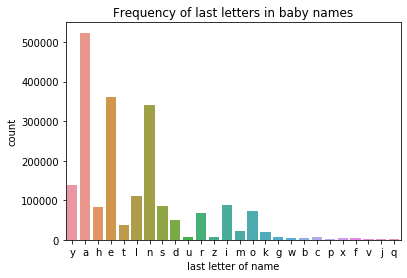

In [142]:
sns.countplot(data=df, x="last letter of name")
plt.title("Frequency of last letters in baby names")
plt.savefig("last-letter-freq.png", dpi=150)

## Task 4
#### Creating a timeline and a lineplot for the letter 'Y' and saving it in .png format (Task 7).

In [143]:
letter_y = df[df["last letter of name"] == "y"].groupby('year')["last letter of name"].count()
letter_y

year
1880     148
1881     142
1882     167
1883     151
1884     179
        ... 
2017    2049
2018    2015
2019    2031
2020    1995
2021    2029
Name: last letter of name, Length: 142, dtype: int64

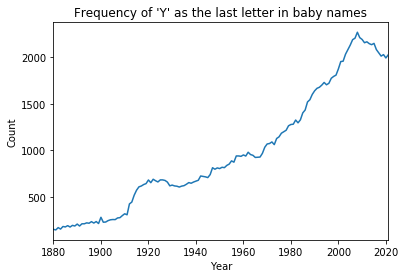

In [144]:
letter_y_plot = letter_y.plot()
plt.title("Frequency of 'Y' as the last letter in baby names")
plt.xlabel("Year")
plt.ylabel("Count")
plt.savefig("letterY.png", dpi=150)
plt.show()

## Task 5
#### Plotting timelines for the letters D, N, and Y. Saving the plot to .png format (Task 7).

In [145]:
df_year_ll = df.groupby(['last letter of name', 'year'])['count'].count()
df_year_ll

last letter of name  year
a                    1880    450
                     1881    432
                     1882    478
                     1883    480
                     1884    543
                            ... 
z                    2017    160
                     2018    161
                     2019    155
                     2020    163
                     2021    159
Name: count, Length: 3530, dtype: int64

In [146]:
df_year_ll.unstack(0)

last letter of name,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,450.0,7.0,7.0,93.0,490.0,7.0,9.0,60.0,7.0,NaN,...,NaN,89.0,125.0,76.0,5.0,1.0,7.0,4.0,148.0,4.0
1881,432.0,6.0,8.0,85.0,484.0,5.0,13.0,59.0,6.0,NaN,...,NaN,83.0,116.0,78.0,4.0,1.0,7.0,5.0,142.0,2.0
1882,478.0,7.0,8.0,96.0,538.0,8.0,10.0,70.0,6.0,NaN,...,NaN,87.0,124.0,83.0,3.0,1.0,8.0,5.0,167.0,4.0
1883,480.0,5.0,8.0,96.0,542.0,7.0,10.0,61.0,4.0,NaN,...,NaN,86.0,122.0,79.0,4.0,1.0,9.0,6.0,151.0,2.0
1884,543.0,10.0,7.0,101.0,584.0,6.0,10.0,72.0,4.0,NaN,...,NaN,100.0,133.0,83.0,4.0,1.0,7.0,4.0,179.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6819.0,121.0,113.0,544.0,4091.0,78.0,124.0,2478.0,2424.0,75.0,...,26.0,1384.0,1172.0,504.0,152.0,90.0,52.0,157.0,2049.0,160.0
2018,6674.0,114.0,98.0,517.0,4009.0,80.0,111.0,2421.0,2503.0,71.0,...,28.0,1381.0,1179.0,488.0,155.0,88.0,51.0,165.0,2015.0,161.0
2019,6532.0,114.0,110.0,526.0,3965.0,73.0,99.0,2407.0,2658.0,71.0,...,22.0,1424.0,1195.0,471.0,157.0,87.0,52.0,170.0,2031.0,155.0


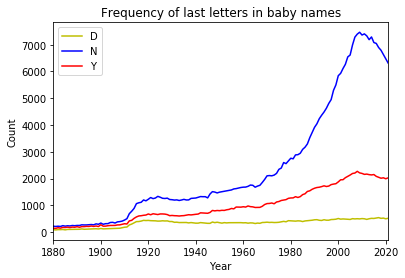

In [147]:
dPlot = df_year_ll["d"]
nPlot = df_year_ll["n"]
yPlot = df_year_ll["y"]
dPlot.plot(color="y", label="D")
nPlot.plot(color="b", label="N")
yPlot.plot(color="r", label="Y")
plt.title("Frequency of last letters in baby names")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.savefig("plotDNY.png", dpi=150)
plt.show()

## Task 6
#### Looking at first letter/last letter combinations and displaying them as a heatmap (saving it to .png).

In [148]:
first_letter = df["name"].str[:1]
first_letter.head()

0    M
1    A
2    E
3    E
4    M
Name: name, dtype: object

In [149]:
df["first letter of name"] = first_letter
df['last letter of name'] = df['last letter of name'].str.upper()
df['name'] = df['name'].str.upper()
df.head()

,name,gender,count,year,last letter of name,first letter of name
0,MARY,F,7065,1880,Y,M
1,ANNA,F,2604,1880,A,A
2,EMMA,F,2003,1880,A,E
3,ELIZABETH,F,1939,1880,H,E
4,MINNIE,F,1746,1880,E,M


In [150]:
df.sort_values(by='count', axis=0)
df.head()

,name,gender,count,year,last letter of name,first letter of name
0,MARY,F,7065,1880,Y,M
1,ANNA,F,2604,1880,A,A
2,EMMA,F,2003,1880,A,E
3,ELIZABETH,F,1939,1880,H,E
4,MINNIE,F,1746,1880,E,M


In [151]:
df_first_last = df.groupby(['first letter of name', 'last letter of name'])['count'].count()
df_first_last

first letter of name  last letter of name
A                     A                      66332
                      B                        398
                      C                        744
                      D                       3247
                      E                      31096
                                             ...  
Z                     V                        108
                      W                          4
                      X                          2
                      Y                       1595
                      Z                         12
Name: count, Length: 626, dtype: int64

In [152]:
df_FL = df_first_last.unstack(0)

In [153]:
df_FL.head()

first letter of name,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
last letter of name,,,,,,,,,,,,,,,,,,,,,
A,66332.0,13044.0,29486.0,32302.0,23524.0,8495.0,10762.0,6138.0,10835.0,25602.0,...,1626.0,23573.0,43570.0,37680.0,1259.0,14418.0,4076.0,979.0,5590.0,9675.0
B,398.0,239.0,430.0,43.0,151.0,NaN,63.0,227.0,4.0,1043.0,...,NaN,271.0,340.0,126.0,NaN,NaN,136.0,NaN,124.0,448.0
C,744.0,157.0,378.0,1092.0,514.0,291.0,20.0,21.0,760.0,381.0,...,27.0,292.0,114.0,189.0,63.0,104.0,10.0,23.0,8.0,111.0
D,3247.0,3022.0,2138.0,3117.0,2503.0,1526.0,2563.0,2686.0,428.0,3230.0,...,37.0,6536.0,3443.0,1606.0,47.0,269.0,2449.0,NaN,202.0,494.0
E,31096.0,16117.0,31701.0,26567.0,18068.0,5676.0,12163.0,6625.0,3671.0,35234.0,...,633.0,17300.0,22708.0,15125.0,363.0,7259.0,3854.0,213.0,1941.0,2946.0


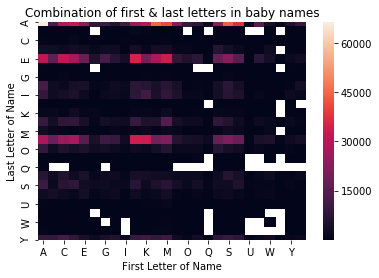

In [154]:
heatmap_FL = sns.heatmap(df_FL)
plt.title("Combination of first & last letters in baby names")
plt.xlabel("First Letter of Name")
plt.ylabel("Last Letter of Name")
plt.savefig("heatmap.png", dpi=150)

## Task 8
#### It makes the most sense to me to plot comparison between the last letters in boy's and girl's names as a grouped bar chart for each letter. Having the bars for boys and girls next to each other allows for the most vivid illustration of differences. A powerful alternative would be a faceted bar chart with each letter having its own diagram. 

### Version 1

In [155]:
# Getting the sum total of last letters by gender

df_last_gender = df.groupby(['last letter of name', 'gender'])['count'].count()
df_last_gender

last letter of name  gender
A                    F         494397
                     M          29294
B                    F            640
                     M           4345
C                    F            900
                     M           6098
D                    F           7343
                     M          41674
E                    F         259292
                     M         102748
F                    F            215
                     M           3813
G                    F           1988
                     M           5998
H                    F          59294
                     M          23939
I                    F          62726
                     M          25876
J                    F            275
                     M           1851
K                    F           1838
                     M          17368
L                    F          40558
                     M          69992
M                    F           4879
                     M

In [156]:
# Log-transforming the data

df_last_gender_log10 = np.log10(df_last_gender)
df_last_gender_log10

last letter of name  gender
A                    F         5.694076
                     M         4.466779
B                    F         2.806180
                     M         3.637990
C                    F         2.954243
                     M         3.785187
D                    F         3.865874
                     M         4.619865
E                    F         5.413789
                     M         5.011773
F                    F         2.332438
                     M         3.581267
G                    F         3.298416
                     M         3.778006
H                    F         4.773011
                     M         4.379106
I                    F         4.797448
                     M         4.412897
J                    F         2.439333
                     M         3.267406
K                    F         3.264346
                     M         4.239750
L                    F         4.608077
                     M         4.845048
M           

Text(0, 0.5, 'Count')

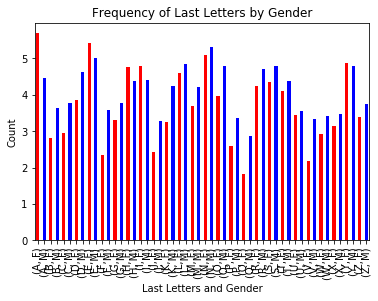

In [157]:
df_last_gender_log10.plot.bar(color=['red', 'blue'])
plt.title("Frequency of Last Letters by Gender")
plt.xlabel("Last Letters and Gender")
plt.ylabel("Count")

###  Version 2

In [158]:
# Getting the sum total for each letter

year_total = df.groupby('last letter of name')['count'].sum()
year_total

last letter of name
A    63380722
B     1560660
C     1799702
D    17391365
E    54249070
F      227057
G      664992
H    16165036
I     5404309
J       45362
K     5629448
L    21674899
M     6607764
N    62068055
O     5239906
P      702510
Q       16309
R    15379404
S    21826860
T    12416166
U      206395
V       74936
W     3251588
X      801561
Y    44819340
Z      284817
Name: count, dtype: int64

In [159]:
# Normalisation

df_LG_normalised = df_last_gender / year_total
np.log10(df_LG_normalised)
df_LG_normalised.head()

last letter of name  gender
A                    F         0.007800
                     M         0.000462
B                    F         0.000410
                     M         0.002784
C                    F         0.000500
Name: count, dtype: float64

Text(0, 0.5, 'Count')

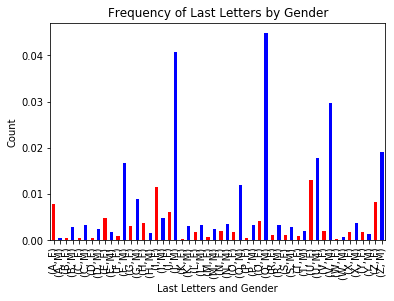

In [160]:
# Plotting the data after normalisation

df_LG_normalised.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title("Frequency of Last Letters by Gender")
plt.xlabel("Last Letters and Gender")
plt.ylabel("Count")